In [65]:
# using keras imdb dataset
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Embedding
from keras.callbacks import ModelCheckpoint

import os
from sklearn.metrics import roc_auc_score

import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# set up params
output = 'model/dense_example'
epochs = 4
batch = 128

n_dim = 64
n_words = 5000
n_words_skip = 50
max_length = 100
pad_type = trunc_type = 'pre' # truncate start of reviews

n_dense = 64
dropout = 0.5

In [76]:
# load data
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=n_words, skip_top=n_words_skip)

In [77]:
# example of how to go back to words from int 
w_idx = keras.datasets.imdb.get_word_index()
w_idx = {k:(v+3) for k,v in w_idx.items()}
w_idx['PAD'] = 0
w_idx['START'] = 1
w_idx['UNK'] = 2

index_word = {v:k for k,v in w_idx.items()}

In [78]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)
x_val = pad_sequences(x_val, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)

In [79]:
# setup our nn model
model = Sequential()

model.add(Embedding(n_words, n_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 64)           320000    
_________________________________________________________________
flatten_14 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                409664    
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(
    x_train, 
    y_train,
    epochs=epochs, 
    batch_size=batch, 
    verbose=1, 
    validation_data=(x_val, y_val))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 170us/step - loss: 0.5578 - acc: 0.6914 - val_loss: 0.3604 - val_acc: 0.8406
Epoch 2/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.2824 - acc: 0.8866 - val_loss: 0.3483 - val_acc: 0.8437
Epoch 3/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.1162 - acc: 0.9641 - val_loss: 0.4230 - val_acc: 0.8338
Epoch 4/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.0244 - acc: 0.9960 - val_loss: 0.5274 - val_acc: 0.8323


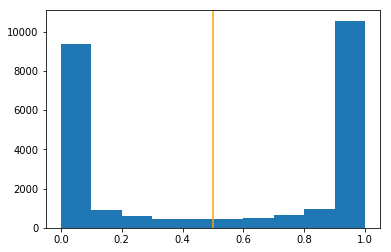

In [82]:
plt.hist(model.predict(x_val))
_ = plt.axvline(x=0.5, color='orange')